In [1]:
from sklearn.manifold import TSNE
import PyTorchNN
import torch
from torchvision import transforms
import torchvision.datasets as dset
from torch.utils.data import DataLoader
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

version = input("version to use: ")
path_modelSave = "Model/SceneDetector/version " + version + ".pt"
data_path = "./Data/SceneDetector/train/"
print("Using data path: ", data_path, "\n\n")

model = torch.load(path_modelSave)
model.eval()

model.to(model.device)
BATCH_SIZE = model.input_shape[0]
IMG_SIZE  = model.input_shape[2]
transformations = model.transformations


dataset = dset.ImageFolder(root = data_path, transform = transformations)
dataloader = DataLoader(dataset, batch_size = BATCH_SIZE, shuffle = True, num_workers = 4, pin_memory=True, timeout=120)
print("Layer Names For Reference: ")
for name, layer in model.model.named_children():
        print("\t" + name)

Using data path:  ./Data/SceneDetector/train/ 


Layer Names For Reference: 
	_1_Conv2d_
	_2_Conv2d_
	_2_Maxpool2d_
	_2_Dropout2d_
	_2_Activation_LeakyReLU_
	_3_Conv2d_
	_4_Conv2d_
	_4_Maxpool2d_
	_4_Activation_LeakyReLU_
	_5_Conv2d_
	_5_Maxpool2d_
	_5_Activation_LeakyReLU_
	_5_Flatten_
	_6_Linear_
	_6_BatchNorm1d_
	_6_Activation_LeakyReLU_
	_7_Linear_
	_7_Activation_LeakyReLU_
	_8_Linear_
	_8_Activation_LeakyReLU_
	_9_Linear_


In [2]:
# List of Layers from which the output has to be taken.
listOfLayers = [
    '_2_Activation_LeakyReLU_',
    '_4_Activation_LeakyReLU_', 
    '_5_Flatten_', 
    '_6_Activation_LeakyReLU_', 
    '_7_Activation_LeakyReLU_', 
    '_8_Activation_LeakyReLU_',
    '_9_Linear_'
]

In [3]:
layer_outputs = PyTorchNN.LayerOutputs(model, listOfLayers)
layer_outputs.getOutputs(dataloader)

labels = layer_outputs.labels
features = layer_outputs.makeFeatures()

100%|██████████| 345/345 [01:41<00:00,  3.38it/s]


In [4]:
print("Total Encodings in Each Layer: ", len(list(layer_outputs.outputs.values())[0]))
print("Total Labels: ", len(labels))

Total Encodings in Each Layer:  11035
Total Labels:  11035


Layer Name: _2_Activation_LeakyReLU_
Layer Shape: (11035, 131072)
[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 11035 samples in 1.008s...
[t-SNE] Computed neighbors for 11035 samples in 350.754s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11035
[t-SNE] Computed conditional probabilities for sample 2000 / 11035
[t-SNE] Computed conditional probabilities for sample 3000 / 11035
[t-SNE] Computed conditional probabilities for sample 4000 / 11035
[t-SNE] Computed conditional probabilities for sample 5000 / 11035
[t-SNE] Computed conditional probabilities for sample 6000 / 11035
[t-SNE] Computed conditional probabilities for sample 7000 / 11035
[t-SNE] Computed conditional probabilities for sample 8000 / 11035
[t-SNE] Computed conditional probabilities for sample 9000 / 11035
[t-SNE] Computed conditional probabilities for sample 10000 / 11035
[t-SNE] Computed conditional probabilities for sample 11000 / 11035
[t-SNE] Computed conditional probabilities for sam

c:\Users\aarat\.conda\envs\pyt\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


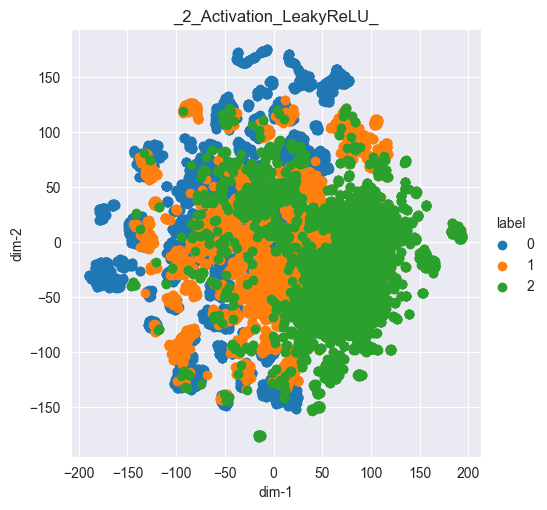

Layer Name: _4_Activation_LeakyReLU_
Layer Shape: (11035, 2048)
[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 11035 samples in 0.020s...
[t-SNE] Computed neighbors for 11035 samples in 6.829s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11035
[t-SNE] Computed conditional probabilities for sample 2000 / 11035
[t-SNE] Computed conditional probabilities for sample 3000 / 11035
[t-SNE] Computed conditional probabilities for sample 4000 / 11035
[t-SNE] Computed conditional probabilities for sample 5000 / 11035
[t-SNE] Computed conditional probabilities for sample 6000 / 11035
[t-SNE] Computed conditional probabilities for sample 7000 / 11035
[t-SNE] Computed conditional probabilities for sample 8000 / 11035
[t-SNE] Computed conditional probabilities for sample 9000 / 11035
[t-SNE] Computed conditional probabilities for sample 10000 / 11035
[t-SNE] Computed conditional probabilities for sample 11000 / 11035
[t-SNE] Computed conditional probabilities for sample 

c:\Users\aarat\.conda\envs\pyt\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


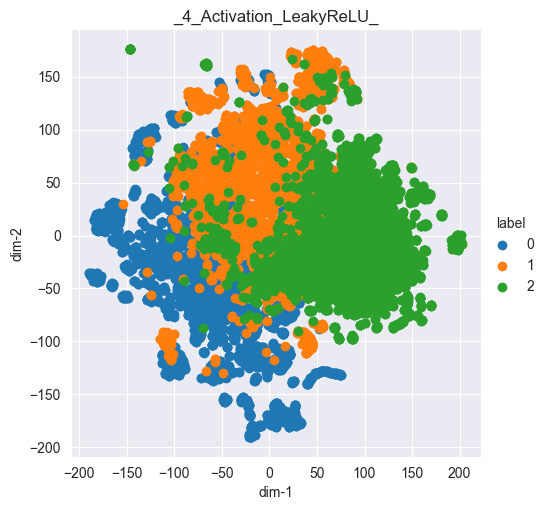

Layer Name: _5_Flatten_
Layer Shape: (11035, 256)
[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 11035 samples in 0.002s...
[t-SNE] Computed neighbors for 11035 samples in 1.300s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11035
[t-SNE] Computed conditional probabilities for sample 2000 / 11035
[t-SNE] Computed conditional probabilities for sample 3000 / 11035
[t-SNE] Computed conditional probabilities for sample 4000 / 11035
[t-SNE] Computed conditional probabilities for sample 5000 / 11035
[t-SNE] Computed conditional probabilities for sample 6000 / 11035
[t-SNE] Computed conditional probabilities for sample 7000 / 11035
[t-SNE] Computed conditional probabilities for sample 8000 / 11035
[t-SNE] Computed conditional probabilities for sample 9000 / 11035
[t-SNE] Computed conditional probabilities for sample 10000 / 11035
[t-SNE] Computed conditional probabilities for sample 11000 / 11035
[t-SNE] Computed conditional probabilities for sample 11035 / 11035


c:\Users\aarat\.conda\envs\pyt\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


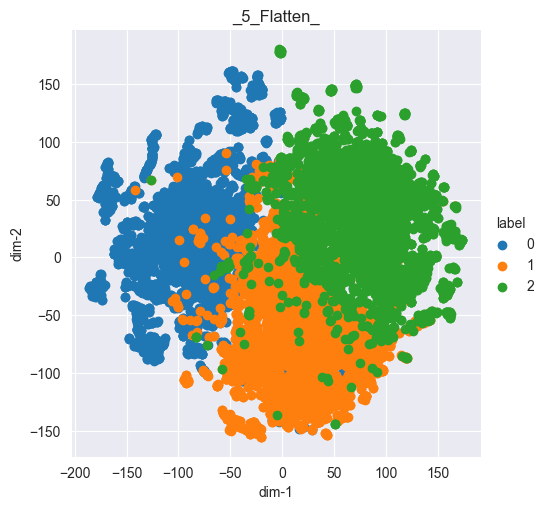

Layer Name: _6_Activation_LeakyReLU_
Layer Shape: (11035, 128)
[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 11035 samples in 0.002s...
[t-SNE] Computed neighbors for 11035 samples in 0.643s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11035
[t-SNE] Computed conditional probabilities for sample 2000 / 11035
[t-SNE] Computed conditional probabilities for sample 3000 / 11035
[t-SNE] Computed conditional probabilities for sample 4000 / 11035
[t-SNE] Computed conditional probabilities for sample 5000 / 11035
[t-SNE] Computed conditional probabilities for sample 6000 / 11035
[t-SNE] Computed conditional probabilities for sample 7000 / 11035
[t-SNE] Computed conditional probabilities for sample 8000 / 11035
[t-SNE] Computed conditional probabilities for sample 9000 / 11035
[t-SNE] Computed conditional probabilities for sample 10000 / 11035
[t-SNE] Computed conditional probabilities for sample 11000 / 11035
[t-SNE] Computed conditional probabilities for sample 1

c:\Users\aarat\.conda\envs\pyt\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


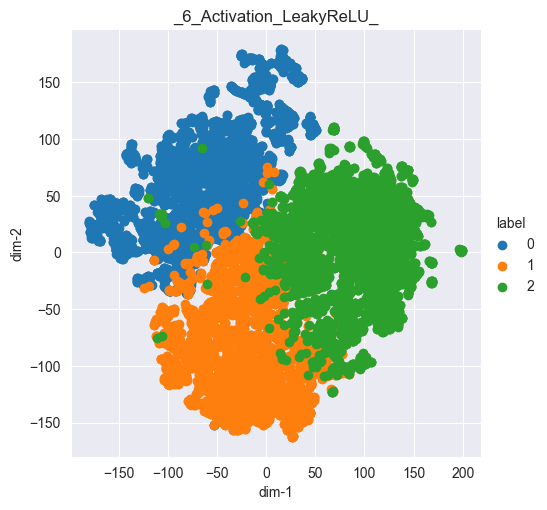

Layer Name: _7_Activation_LeakyReLU_
Layer Shape: (11035, 64)
[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 11035 samples in 0.002s...
[t-SNE] Computed neighbors for 11035 samples in 0.593s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11035
[t-SNE] Computed conditional probabilities for sample 2000 / 11035
[t-SNE] Computed conditional probabilities for sample 3000 / 11035
[t-SNE] Computed conditional probabilities for sample 4000 / 11035
[t-SNE] Computed conditional probabilities for sample 5000 / 11035
[t-SNE] Computed conditional probabilities for sample 6000 / 11035
[t-SNE] Computed conditional probabilities for sample 7000 / 11035
[t-SNE] Computed conditional probabilities for sample 8000 / 11035
[t-SNE] Computed conditional probabilities for sample 9000 / 11035
[t-SNE] Computed conditional probabilities for sample 10000 / 11035
[t-SNE] Computed conditional probabilities for sample 11000 / 11035
[t-SNE] Computed conditional probabilities for sample 11

c:\Users\aarat\.conda\envs\pyt\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


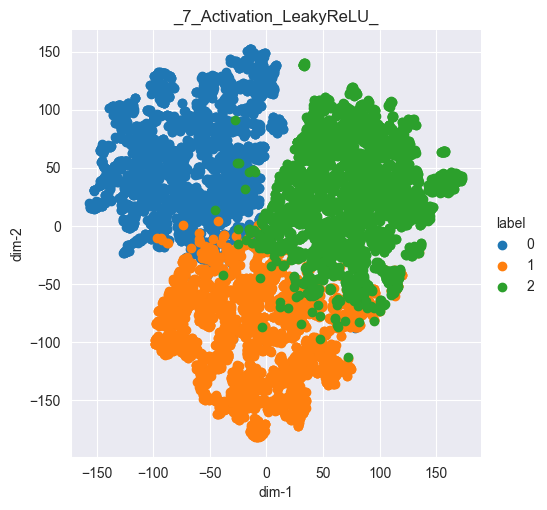

Layer Name: _8_Activation_LeakyReLU_
Layer Shape: (11035, 32)
[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 11035 samples in 0.000s...
[t-SNE] Computed neighbors for 11035 samples in 0.463s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11035
[t-SNE] Computed conditional probabilities for sample 2000 / 11035
[t-SNE] Computed conditional probabilities for sample 3000 / 11035
[t-SNE] Computed conditional probabilities for sample 4000 / 11035
[t-SNE] Computed conditional probabilities for sample 5000 / 11035
[t-SNE] Computed conditional probabilities for sample 6000 / 11035
[t-SNE] Computed conditional probabilities for sample 7000 / 11035
[t-SNE] Computed conditional probabilities for sample 8000 / 11035
[t-SNE] Computed conditional probabilities for sample 9000 / 11035
[t-SNE] Computed conditional probabilities for sample 10000 / 11035
[t-SNE] Computed conditional probabilities for sample 11000 / 11035
[t-SNE] Computed conditional probabilities for sample 11

c:\Users\aarat\.conda\envs\pyt\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


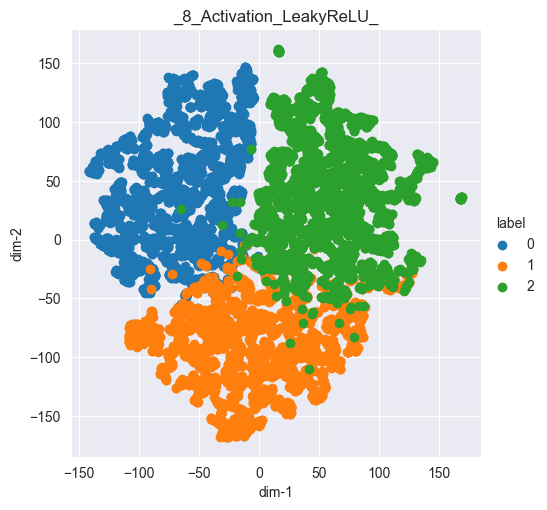

Layer Name: _9_Linear_
Layer Shape: (11035, 3)
[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 11035 samples in 0.017s...
[t-SNE] Computed neighbors for 11035 samples in 0.141s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11035
[t-SNE] Computed conditional probabilities for sample 2000 / 11035
[t-SNE] Computed conditional probabilities for sample 3000 / 11035
[t-SNE] Computed conditional probabilities for sample 4000 / 11035
[t-SNE] Computed conditional probabilities for sample 5000 / 11035
[t-SNE] Computed conditional probabilities for sample 6000 / 11035
[t-SNE] Computed conditional probabilities for sample 7000 / 11035
[t-SNE] Computed conditional probabilities for sample 8000 / 11035
[t-SNE] Computed conditional probabilities for sample 9000 / 11035
[t-SNE] Computed conditional probabilities for sample 10000 / 11035
[t-SNE] Computed conditional probabilities for sample 11000 / 11035
[t-SNE] Computed conditional probabilities for sample 11035 / 11035
[t-

c:\Users\aarat\.conda\envs\pyt\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


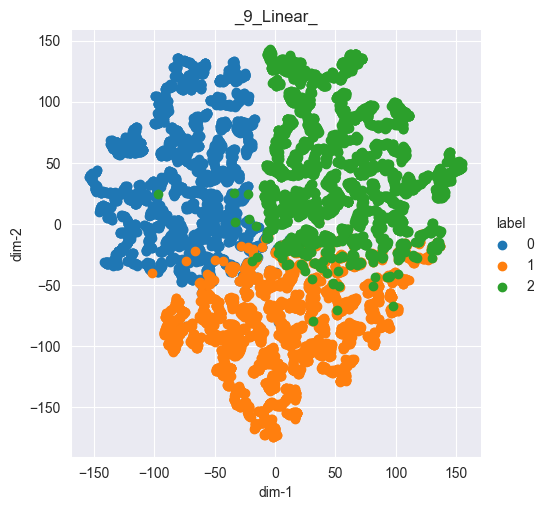

In [5]:
perp = 15
path = "./Layer Outputs/Perplexity " + str(perp) + "/"
if(not os.path.exists(path)):
    os.mkdir(path)

for i in range(len(listOfLayers)):
    X = np.array(features[listOfLayers[i]])
    
    print("Layer Name:", listOfLayers[i])
    print("Layer Shape:", X.shape)    
    
    tsne = TSNE(n_components = 2 , random_state = 1 , perplexity = perp , n_iter = 5000 , learning_rate = 50 , verbose = 5)
    tsne_data = tsne.fit_transform(X)
    tsne_df_1 = pd.DataFrame(data = tsne_data, columns = ['dim-1' , 'dim-2'])
    tsne_df_1["label"] = labels

    sns.set_style("darkgrid")
    sns.FacetGrid(data = tsne_df_1 , hue = "label" , height = 5).map(plt.scatter , 'dim-1' , 'dim-2').add_legend()
    plt.savefig(path + str(i) + " " + listOfLayers[i] + '.png')
    plt.title(listOfLayers[i])
    plt.show()

In [6]:
img_paths = [] 
for img_names in os.listdir(path):
    img_paths.append(os.path.join(path, img_names))

img_paths

['./Layer Outputs/Perplexity 15/0 _2_Activation_LeakyReLU_.png',
 './Layer Outputs/Perplexity 15/1 _4_Activation_LeakyReLU_.png',
 './Layer Outputs/Perplexity 15/2 _5_Flatten_.png',
 './Layer Outputs/Perplexity 15/3 _6_Activation_LeakyReLU_.png',
 './Layer Outputs/Perplexity 15/4 _7_Activation_LeakyReLU_.png',
 './Layer Outputs/Perplexity 15/5 _8_Activation_LeakyReLU_.png',
 './Layer Outputs/Perplexity 15/6 _9_Linear_.png']

In [8]:
import cv2

def create_video(images, output_path, frame_rate=1):
    # Get dimensions of the first image
    image = cv2.imread(images[0])
    height, width, layers = image.shape

    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_path, fourcc, frame_rate, (width, height))

    for image_path in tqdm(images):
        frame = cv2.imread(image_path)
        out.write(frame)

    # Release the VideoWriter
    out.release()

# List of image file paths
output_video_path = path + "train.avi"
create_video(images=img_paths, output_path=output_video_path)
# for i, img_paths in enumerate(folderImg_paths):
#     print("Making:", i)
#     output_video_path = "/".join(img_paths[0].split("/")[:-1]) + "/" + img_paths[0].split("/")[-2] + ".mp4"
#     create_video(img_paths, output_video_path)

  0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:00<00:00, 101.40it/s]


In [35]:
paths

['./Layer Outputs/0. _2_Activation_LeakyReLU_.png',
 './Layer Outputs/1. _4_Activation_LeakyReLU_.png',
 './Layer Outputs/2. _5_Flatten_.png',
 './Layer Outputs/3. _6_Activation_LeakyReLU_.png',
 './Layer Outputs/4. _7_Activation_LeakyReLU_.png',
 './Layer Outputs/5. _8_Activation_LeakyReLU_.png',
 './Layer Outputs/6. _9_Linear_.png']